In [1]:
%pip install seaborn[stats] numpy AutoTS pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
from autots import AutoTS

In [3]:
# Data loading
drive_path = "drive/MyDrive/Colab Data/AutoGluon/PJM_Load_hourly.csv"
local_path = "data/PJM_Load_hourly.csv"

# Choose the correct path depending on the environment
selected_path = drive_path if os.path.exists(drive_path) else local_path

# Load and prepare the training data
train_df = pd.read_csv(selected_path)
train_df['Datetime'] = pd.to_datetime(train_df['Datetime'])
train_df.set_index('Datetime', inplace=True)
train_df = train_df[['PJM_Load_MW']]  # Assuming 'PJM_Load_MW' is the column you want to forecast

# Define label column for use in the forecasting function
label_column = 'PJM_Load_MW'

# Split the data into training and testing datasets
test_duration = '4W'  # 4 weeks for testing data
train_end_date = train_df.index.max() - pd.Timedelta(test_duration)
test_start_date = train_end_date + pd.Timedelta('1h')

train_data = train_df[:train_end_date]
test_data = train_df[test_start_date:]

# Print out the start and end dates of train and test datasets for verification
print(f"Training data ranges from {train_data.index.min()} to {train_data.index.max()}.")
print(f"Testing data ranges from {test_data.index.min()} to {test_data.index.max()}.")


Training data ranges from 1998-04-01 01:00:00 to 2001-12-01 23:00:00.
Testing data ranges from 2001-12-02 00:00:00 to 2001-12-29 23:00:00.


In [4]:
model_list = [
    'AverageValueNaive',
    'SeasonalNaive',
    'GLM',
    'ETS',
    'Theta'
]

model = AutoTS(
    forecast_length=168,
    frequency='h',
    prediction_interval=0.95,
    ensemble=['simple', 'horizontal-min'],
    models_mode='deep',
    model_list = model_list,
    max_generations=10,
    num_validations=3,
    no_negatives=True,
    n_jobs='auto')

model.fit(train_data)

Using 6 cpus for n_jobs.
Data frequency is: h, used frequency is: h
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model ETS in generation 0 of 10
Model Number: 5 with model ETS in generation 0 of 10
Model Number: 6 with model GLM in generation 0 of 10
Model Number: 7 with model GLM in generation 0 of 10
Model Number: 8 with model SeasonalNaive in generation 0 of 10
Model Number: 9 with model SeasonalNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model SeasonalNaive in generation 0 of 10
Model Number: 14 with model Theta in generation 0 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09900D+00    |proj g|=  5.03381D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   2.930D-06   8.075D+00
  F =   8.0752209952258678     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 15 with model AverageValueNaive in generation 0 of 10
Model Number: 16 with model SeasonalNaive in generation 0 of 10
Template Eval Error: Exception("Transformer PowerTransformer f

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 17 in generation 0: GLM
Model Number: 18 with model ETS in generation 0 of 10
Model Number: 19 with model Theta in generation 0 of 10
Model Number: 20 with model AverageValueNaive in generation 0 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.35463e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 21 with model ETS in generation 0 of 10
Model Number: 22 with model Theta in generation 0 of 10
Model Number: 23 with model AverageValueNaive in generation 0 of 10
Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model ETS in generation 0 of 10
Model Number: 26 with model ETS in generation 0 of 10
Model Number: 27 with model AverageValueNaive in generation 0 of 10
Model Number: 28 with model GLM in generation 0 of 10
Model Number: 29 with model Theta in generation 0 of 10
Model Number: 30 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 30 in generation 0: GLM
Model Number: 31 with model Theta in generation 0 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '3': {'rows': 4, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 31 in generation 0: Theta
Model Number: 32 with model SeasonalNaive in generation 0 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 33 with model Theta in generation 0 of 10
Model Number: 34 with model GLM in generation 0 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 34 in generation 0: GLM
Model Number: 35 with model SeasonalNaive in generation 0 of 10
Model Number: 36 with model ETS in generation 0 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.35463e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 37 with model GLM in generation 0 of 10
Model Number: 38 with model Theta in generation 0 of 10
Model Number: 39 with model ETS in generation 0 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


New Generation: 1 of 10
Model Number: 40 with model ETS in generation 1 of 10
Model Number: 41 with model Theta in generation 1 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params ffill {'0': {'rows': 7, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 2, 'deriv': 0, 'mode': 'interp'}}, '2': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 100, 'whiten': True}, '3': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': False}}") in model 41 in generation 1: Theta
Model Number: 42 with model Theta in generation 1 of 10
Model Number: 43 with model SeasonalNaive in generation 1 of 10
Model Number: 44 with model Theta in generation 1 of 10
Template 

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 64 with model AverageValueNaive in generation 1 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


New Generation: 2 of 10
Model Number: 65 with model Theta in generation 2 of 10
Model Number: 66 with model Theta in generation 2 of 10
Model Number: 67 with model Theta in generation 2 of 10
Model Number: 68 with model ETS in generation 2 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 69 with model SeasonalNaive in generation 2 of 10
Model Number: 70 with model Theta in generation 2 of 10
Model Number: 71 with model Theta in generation 2 of 10
Model Number: 72 with model SeasonalNaive in generation 2 of 10
Model Number: 73 with model AverageValueNaive in generation 2 of 10
Model Number: 74 with model Theta in generation 2 of 10
Model Number: 75 with model ETS in generation 2 of 10
Model Number: 76 with model AverageValueNaive in generation 2 of 10
Model Number: 77 with model Theta in generation 2 of 10
Model Number: 78 with model SeasonalNaive in generation 2 of 10
Model Number: 79 with model GLM in generation 2 of 10
Model Number: 80 with model Theta in generation 2 of 10
Model Number: 81 with model ETS in generation 2 of 10
Model Number: 82 with model SeasonalNaive in generation 2 of 10
Model Number: 83 with model GLM in generation 2 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 84 with model SeasonalNaive in generation 2 of 10
Model Number: 85 with model SeasonalNaive in generation 2 of 10
Model Number: 86 with model AverageValueNaive in generation 2 of 10
Model Number: 87 with model ETS in generation 2 of 10
Model Number: 88 with model AverageValueNaive in generation 2 of 10
Model Number: 89 with model SeasonalNaive in generation 2 of 10
New Generation: 3 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 90 with model GLM in generation 3 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 90 in generation 3: GLM
Model Number: 91 with model SeasonalNaive in generation 3 of 10
Model Number: 92 with model ETS in generation 3 of 10
Model Number: 93 with model Theta in generation 3 of 10
Model Number: 94 with model SeasonalNaive in generation 3 of 10
Model Number: 95 with model Theta in generation 3 of 10
Model Number: 96 with model Theta in generation 3 of 10
Model Number: 97 with model GLM in generation 3 of 10
Model Number: 98 with model Theta in generation 3 of 10
Model Number: 99 with model GLM in generation 3 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 100 with model ETS in generation 3 of 10
Model Number: 101 with model ETS in generation 3 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.35463e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params KNNImputer {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'fixed': True, 'window': 12, 'macro_micro': True, 'center': True}, '2': {}, '3': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 300, 'center': False}, 'fillna': 'fake_date', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}, '4': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 1.0}}, 'datepart_method': ['dayofweek', 365.25], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': None

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


New Generation: 4 of 10
Model Number: 115 with model SeasonalNaive in generation 4 of 10
Model Number: 116 with model AverageValueNaive in generation 4 of 10
Model Number: 117 with model AverageValueNaive in generation 4 of 10
Model Number: 118 with model Theta in generation 4 of 10
Model Number: 119 with model SeasonalNaive in generation 4 of 10
Model Number: 120 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params zero {'0': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 250, 'whiten': True}, '1': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, '2': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


Model Number: 140 with model SeasonalNaive in generation 5 of 10
Model Number: 141 with model ETS in generation 5 of 10
Model Number: 142 with model SeasonalNaive in generation 5 of 10
Model Number: 143 with model Theta in generation 5 of 10
Model Number: 144 with model AverageValueNaive in generation 5 of 10
Model Number: 145 with model Theta in generation 5 of 10
Model Number: 146 with model ETS in generation 5 of 10
Model Number: 147 with model SeasonalNaive in generation 5 of 10
Template Eval Error: MemoryError((32015, 32015, 52), dtype('float64')) in model 147 in generation 5: SeasonalNaive
Model Number: 148 with model SeasonalNaive in generation 5 of 10
Model Number: 149 with model ETS in generation 5 of 10
Model Number: 150 with model ETS in generation 5 of 10
Model Number: 151 with model ETS in generation 5 of 10
Model Number: 152 with model AverageValueNaive in generation 5 of 10
Model Number: 153 with model SeasonalNaive in generation 5 of 10
Model Number: 154 with model ETS 

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


New Generation: 6 of 10
Model Number: 160 with model ETS in generation 6 of 10
Model Number: 161 with model ETS in generation 6 of 10
Model Number: 162 with model GLM in generation 6 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 163 with model SeasonalNaive in generation 6 of 10
Model Number: 164 with model SeasonalNaive in generation 6 of 10
Model Number: 165 with model AverageValueNaive in generation 6 of 10
Model Number: 166 with model AverageValueNaive in generation 6 of 10
Model Number: 167 with model SeasonalNaive in generation 6 of 10
Model Number: 168 with model ETS in generation 6 of 10
Model Number: 169 with model ETS in generation 6 of 10
Model Number: 170 with model AverageValueNaive in generation 6 of 10
Model Number: 171 with model ETS in generation 6 of 10
Model Number: 172 with model AverageValueNaive in generation 6 of 10
Model Number: 173 with model Theta in generation 6 of 10
Model Number: 174 with model SeasonalNaive in generation 6 of 10
Model Number: 175 with model Theta in generation 6 of 10
Model Number: 176 with model Theta in generation 6 of 10
Model Number: 177 with model ETS in generation 6 of 10
Model Number: 178 with model Theta in generation 6 of 10
Model Number: 17

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


Model Number: 181 with model SeasonalNaive in generation 7 of 10
Model Number: 182 with model AverageValueNaive in generation 7 of 10
Model Number: 183 with model SeasonalNaive in generation 7 of 10
Model Number: 184 with model ETS in generation 7 of 10
Model Number: 185 with model SeasonalNaive in generation 7 of 10
Model Number: 186 with model Theta in generation 7 of 10
Model Number: 187 with model ETS in generation 7 of 10
Model Number: 188 with model AverageValueNaive in generation 7 of 10
Model Number: 189 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {}, '1': {'method': 'remove', 'std_threshold': 4, 'fillna': 'mean'}, '2': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, '

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 202 with model Theta in generation 8 of 10
Model Number: 203 with model AverageValueNaive in generation 8 of 10
Model Number: 204 with model ETS in generation 8 of 10
Model Number: 205 with model ETS in generation 8 of 10
Model Number: 206 with model AverageValueNaive in generation 8 of 10
Model Number: 207 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False}, '1': {'n_harmonics': 10, 'detrend': 'quadratic'}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 207 in generation 8: SeasonalNaive
Model Number: 208 with model ETS in generation 8 of 10
Model Number: 209 with model AverageValueNaive in generation 8 of 10
Template Eval

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/hom

Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params mean {'0': {'lag_1': 2, 'method': 'Mean'}, '1': {}, '2': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'mad', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'anomaly_score', 'regression_params': {}}, '3': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 200, 'center': False}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': True}, '4': {}, '5': {'model_name': 'randomly ge

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


New Generation: 9 of 10
Model Number: 220 with model SeasonalNaive in generation 9 of 10
Model Number: 221 with model SeasonalNaive in generation 9 of 10
Model Number: 222 with model SeasonalNaive in generation 9 of 10
Model Number: 223 with model ETS in generation 9 of 10
Model Number: 224 with model Theta in generation 9 of 10
Model Number: 225 with model AverageValueNaive in generation 9 of 10
Model Number: 226 with model AverageValueNaive in generation 9 of 10
Model Number: 227 with model AverageValueNaive in generation 9 of 10
Model Number: 228 with model AverageValueNaive in generation 9 of 10
Model Number: 229 with model ETS in generation 9 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 230 with model AverageValueNaive in generation 9 of 10
Model Number: 231 with model ETS in generation 9 of 10
Model Number: 232 with model AverageValueNaive in generation 9 of 10
Model Number: 233 with model AverageValueNaive in generation 9 of 10
Model Number: 234 with model SeasonalNaive in generation 9 of 10
Model Number: 235 with model AverageValueNaive in generation 9 of 10
Model Number: 236 with model AverageValueNaive in generation 9 of 10
Model Number: 237 with model ETS in generation 9 of 10
Model Number: 238 with model AverageValueNaive in generation 9 of 10
Model Number: 239 with model SeasonalNaive in generation 9 of 10
Template Eval Error: MemoryError((32015, 32015, 52), dtype('float64')) in model 239 in generation 9: SeasonalNaive
New Generation: 10 of 10
Model Number: 240 with model SeasonalNaive in generation 10 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


Model Number: 241 with model AverageValueNaive in generation 10 of 10
Model Number: 242 with model ETS in generation 10 of 10
Model Number: 243 with model SeasonalNaive in generation 10 of 10
Model Number: 244 with model AverageValueNaive in generation 10 of 10
Model Number: 245 with model ETS in generation 10 of 10
Model Number: 246 with model AverageValueNaive in generation 10 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 247 with model SeasonalNaive in generation 10 of 10
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'discretization': 'sklearn-quantile', 'n_bins': 50}, '1': {'whiten': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': True}, '3': {}, '4': {}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 247 in generation 10: SeasonalNaive
Model Number: 248 with model SeasonalNaive in generation 10 of 10
Model Number: 249 with model ETS in generation 10 of 10
Model Number: 250 with model ETS in generation 10 of 10
Model Number: 251 with model ETS in generation 10 of 10
Model Number: 252 with model SeasonalNaive in generation 10 of 10
Model Number: 253 with model SeasonalNaive in generation 10 of 10
Model Number: 254 with model SeasonalNaive in generation 10 of 10


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


Model Number: 255 with model Ensemble in generation 11 of Ensembles
Model Number: 256 with model Ensemble in generation 11 of Ensembles
Model Number: 257 with model Ensemble in generation 11 of Ensembles
Model Number: 258 with model Ensemble in generation 11 of Ensembles
Model Number: 259 with model Ensemble in generation 11 of Ensembles
Model Number: 260 with model Ensemble in generation 11 of Ensembles
Model Number: 261 with model Ensemble in generation 11 of Ensembles
Model Number: 262 with model Ensemble in generation 11 of Ensembles


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


Validation Round: 1
Model Number: 1 of 40 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 7.42: 
Model Number: 2 of 40 with model Ensemble for Validation 1
2 - Ensemble with avg smape 8.74: 
Model Number: 3 of 40 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 7.24: 
Model Number: 4 of 40 with model Ensemble for Validation 1
4 - Ensemble with avg smape 8.56: 
Model Number: 5 of 40 with model Ensemble for Validation 1
5 - Ensemble with avg smape 8.56: 
Model Number: 6 of 40 with model Ensemble for Validation 1
6 - Ensemble with avg smape 9.38: 
Model Number: 7 of 40 with model Ensemble for Validation 1
📈 7 - Ensemble with avg smape 6.15: 
Model Number: 8 of 40 with model SeasonalNaive for Validation 1
8 - SeasonalNaive with avg smape 6.2: 
Model Number: 9 of 40 with model SeasonalNaive for Validation 1
9 - SeasonalNaive with avg smape 6.16: 
Model Number: 10 of 40 with model SeasonalNaive for Validation 1
10 - SeasonalNaive with avg smape 14.31: 
Mo

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


23 - AverageValueNaive with avg smape 15.13: 
Model Number: 24 of 40 with model AverageValueNaive for Validation 1
24 - AverageValueNaive with avg smape 9.0: 
Model Number: 25 of 40 with model AverageValueNaive for Validation 1
25 - AverageValueNaive with avg smape 9.0: 
Model Number: 26 of 40 with model AverageValueNaive for Validation 1
26 - AverageValueNaive with avg smape 9.0: 
Model Number: 27 of 40 with model SeasonalNaive for Validation 1
27 - SeasonalNaive with avg smape 15.0: 
Model Number: 28 of 40 with model AverageValueNaive for Validation 1
28 - AverageValueNaive with avg smape 8.43: 
Model Number: 29 of 40 with model ETS for Validation 1
29 - ETS with avg smape 9.0: 
Model Number: 30 of 40 with model ETS for Validation 1
30 - ETS with avg smape 9.0: 
Model Number: 31 of 40 with model ETS for Validation 1
31 - ETS with avg smape 9.0: 
Model Number: 32 of 40 with model ETS for Validation 1
32 - ETS with avg smape 9.0: 
Model Number: 33 of 40 with model ETS for Validation 1


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


📈 1 - Ensemble with avg smape 5.56: 
Model Number: 2 of 40 with model Ensemble for Validation 2
2 - Ensemble with avg smape 6.76: 
Model Number: 3 of 40 with model Ensemble for Validation 2
📈 3 - Ensemble with avg smape 5.07: 
Model Number: 4 of 40 with model Ensemble for Validation 2
4 - Ensemble with avg smape 7.35: 
Model Number: 5 of 40 with model Ensemble for Validation 2
5 - Ensemble with avg smape 7.35: 
Model Number: 6 of 40 with model Ensemble for Validation 2
6 - Ensemble with avg smape 5.71: 
Model Number: 7 of 40 with model Ensemble for Validation 2
7 - Ensemble with avg smape 6.51: 
Model Number: 8 of 40 with model SeasonalNaive for Validation 2
8 - SeasonalNaive with avg smape 6.34: 
Model Number: 9 of 40 with model SeasonalNaive for Validation 2
9 - SeasonalNaive with avg smape 6.44: 
Model Number: 10 of 40 with model SeasonalNaive for Validation 2
10 - SeasonalNaive with avg smape 5.84: 
Model Number: 11 of 40 with model SeasonalNaive for Validation 2
11 - SeasonalNaive

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


23 - AverageValueNaive with avg smape 8.73: 
Model Number: 24 of 40 with model AverageValueNaive for Validation 2
24 - AverageValueNaive with avg smape 10.21: 
Model Number: 25 of 40 with model AverageValueNaive for Validation 2
25 - AverageValueNaive with avg smape 10.21: 
Model Number: 26 of 40 with model AverageValueNaive for Validation 2
26 - AverageValueNaive with avg smape 10.21: 
Model Number: 27 of 40 with model SeasonalNaive for Validation 2
27 - SeasonalNaive with avg smape 7.72: 
Model Number: 28 of 40 with model AverageValueNaive for Validation 2
28 - AverageValueNaive with avg smape 9.72: 
Model Number: 29 of 40 with model ETS for Validation 2
29 - ETS with avg smape 10.21: 
Model Number: 30 of 40 with model ETS for Validation 2
30 - ETS with avg smape 10.21: 
Model Number: 31 of 40 with model ETS for Validation 2
31 - ETS with avg smape 10.21: 
Model Number: 32 of 40 with model ETS for Validation 2
32 - ETS with avg smape 10.21: 
Model Number: 33 of 40 with model ETS for 

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


📈 1 - Ensemble with avg smape 4.27: 
Model Number: 2 of 40 with model Ensemble for Validation 3
2 - Ensemble with avg smape 5.67: 
Model Number: 3 of 40 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 4.14: 
Model Number: 4 of 40 with model Ensemble for Validation 3
4 - Ensemble with avg smape 6.3: 
Model Number: 5 of 40 with model Ensemble for Validation 3
5 - Ensemble with avg smape 6.3: 
Model Number: 6 of 40 with model Ensemble for Validation 3
6 - Ensemble with avg smape 4.41: 
Model Number: 7 of 40 with model Ensemble for Validation 3
7 - Ensemble with avg smape 5.28: 
Model Number: 8 of 40 with model SeasonalNaive for Validation 3
8 - SeasonalNaive with avg smape 5.43: 
Model Number: 9 of 40 with model SeasonalNaive for Validation 3
9 - SeasonalNaive with avg smape 5.32: 
Model Number: 10 of 40 with model SeasonalNaive for Validation 3
📈 10 - SeasonalNaive with avg smape 3.02: 
Model Number: 11 of 40 with model SeasonalNaive for Validation 3
11 - SeasonalNaive

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


23 - AverageValueNaive with avg smape 7.24: 
Model Number: 24 of 40 with model AverageValueNaive for Validation 3
24 - AverageValueNaive with avg smape 9.02: 
Model Number: 25 of 40 with model AverageValueNaive for Validation 3
25 - AverageValueNaive with avg smape 9.02: 
Model Number: 26 of 40 with model AverageValueNaive for Validation 3
26 - AverageValueNaive with avg smape 9.02: 
Model Number: 27 of 40 with model SeasonalNaive for Validation 3
27 - SeasonalNaive with avg smape 6.21: 
Model Number: 28 of 40 with model AverageValueNaive for Validation 3
28 - AverageValueNaive with avg smape 8.67: 
Model Number: 29 of 40 with model ETS for Validation 3
29 - ETS with avg smape 9.02: 
Model Number: 30 of 40 with model ETS for Validation 3
30 - ETS with avg smape 9.02: 
Model Number: 31 of 40 with model ETS for Validation 3
31 - ETS with avg smape 9.02: 
Model Number: 32 of 40 with model ETS for Validation 3
32 - ETS with avg smape 9.02: 
Model Number: 33 of 40 with model ETS for Validat

/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2413: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behav

Model Number: 384 with model Ensemble in generation 12 of Ensembles
Model Number: 385 with model Ensemble in generation 12 of Ensembles
Model Number: 386 with model Ensemble in generation 12 of Ensembles
Model Number: 387 with model Ensemble in generation 12 of Ensembles
Model Number: 388 with model Ensemble in generation 12 of Ensembles
Model Number: 389 with model Ensemble in generation 12 of Ensembles
Model Number: 390 with model Ensemble in generation 12 of Ensembles


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 5.57: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 5.95: 
Model Number: 3 of 8 with model Ensemble for Validation 1
3 - Ensemble with avg smape 5.78: 
Model Number: 4 of 8 with model Ensemble for Validation 1
4 - Ensemble with avg smape 8.03: 
Model Number: 5 of 8 with model Ensemble for Validation 1
5 - Ensemble with avg smape 6.01: 
Model Number: 6 of 8 with model Ensemble for Validation 1
6 - Ensemble with avg smape 6.98: 
Model Number: 7 of 8 with model Ensemble for Validation 1
7 - Ensemble with avg smape 6.2: 
Model Number: 8 of 8 with model Ensemble for Validation 1
8 - Ensemble with avg smape 6.27: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


📈 1 - Ensemble with avg smape 3.9: 
Model Number: 2 of 8 with model Ensemble for Validation 2
2 - Ensemble with avg smape 4.72: 
Model Number: 3 of 8 with model Ensemble for Validation 2
3 - Ensemble with avg smape 4.33: 
Model Number: 4 of 8 with model Ensemble for Validation 2
4 - Ensemble with avg smape 4.03: 
Model Number: 5 of 8 with model Ensemble for Validation 2
5 - Ensemble with avg smape 5.62: 
Model Number: 6 of 8 with model Ensemble for Validation 2
6 - Ensemble with avg smape 6.63: 
Model Number: 7 of 8 with model Ensemble for Validation 2
7 - Ensemble with avg smape 5.51: 
Model Number: 8 of 8 with model Ensemble for Validation 2
8 - Ensemble with avg smape 5.92: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(


📈 1 - Ensemble with avg smape 3.48: 
Model Number: 2 of 8 with model Ensemble for Validation 3
2 - Ensemble with avg smape 3.83: 
Model Number: 3 of 8 with model Ensemble for Validation 3
3 - Ensemble with avg smape 3.61: 
Model Number: 4 of 8 with model Ensemble for Validation 3
📈 4 - Ensemble with avg smape 3.16: 
Model Number: 5 of 8 with model Ensemble for Validation 3
5 - Ensemble with avg smape 4.44: 
Model Number: 6 of 8 with model Ensemble for Validation 3
6 - Ensemble with avg smape 5.54: 
Model Number: 7 of 8 with model Ensemble for Validation 3
7 - Ensemble with avg smape 4.58: 
Model Number: 8 of 8 with model Ensemble for Validation 3
8 - Ensemble with avg smape 4.94: 


/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_ts.py:1829: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  template_result.model_results['TotalRuntime'].fillna(
/home/dan/github/ml_forecast_comparison/venv/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2413: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behav

Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'BestN', 'model_count': 5, 'model_metric': 'mixed_metric', 'models': {'edbb529d3b2d70099f9d67a61aad5cc7': {'Model': 'SeasonalNaive', 'ModelParameters': '{"method": "lastvalue", "lag_1": 168, "lag_2": null}', 'TransformationParameters': '{"fillna": "rolling_mean_24", "transformations": {"0": "AnomalyRemoval", "1": "ClipOutliers", "2": "PowerTransformer"}, "transformation_params": {"0": {"method": "EE", "method_params": {"contamination": 0.1, "assume_centered": true, "support_fraction": null}, "fillna": "rolling_mean_24", "transform_dict": null, "isolated_only": true}, "1": {"method": "remove", "std_threshold": 4, "fillna": "mean"}, "2": {}}}'}, '4de9a4e72f6b3e271d3edad3c4188dcc': {'Model': 'SeasonalNaive', 'ModelParameters': '{"method": "lastvalue", "lag_1": 168, "lag_2": null}', 'TransformationParameters': '{"fillna": "rolling_mean_24", "transformations": {"0": "MaxAbsScaler", "1": "ClipOutliers", "2": "PowerTransform

In [30]:
prediction = model.predict(forecast_length=163)
print(prediction)
print(prediction.forecast)

Prediction object: 
Return .forecast, 
 .upper_forecast, 
 .lower_forecast 
 .model_parameters 
 .transformation_parameters
                      PJM_Load_MW
2001-12-02 00:00:00  26195.635292
2001-12-02 01:00:00  24903.700401
2001-12-02 02:00:00  24007.502800
2001-12-02 03:00:00  23480.484536
2001-12-02 04:00:00  23273.910136
...                           ...
2001-12-08 14:00:00  31546.081450
2001-12-08 15:00:00  31157.968114
2001-12-08 16:00:00  30940.045174
2001-12-08 17:00:00  31956.758439
2001-12-08 18:00:00  32648.772258

[163 rows x 1 columns]


/tmp/ipykernel_1132688/141975856.py:7: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  hist_last_week = train_data.last('2W')
/tmp/ipykernel_1132688/141975856.py:15: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  forecast_index = test_data.first('2W').index


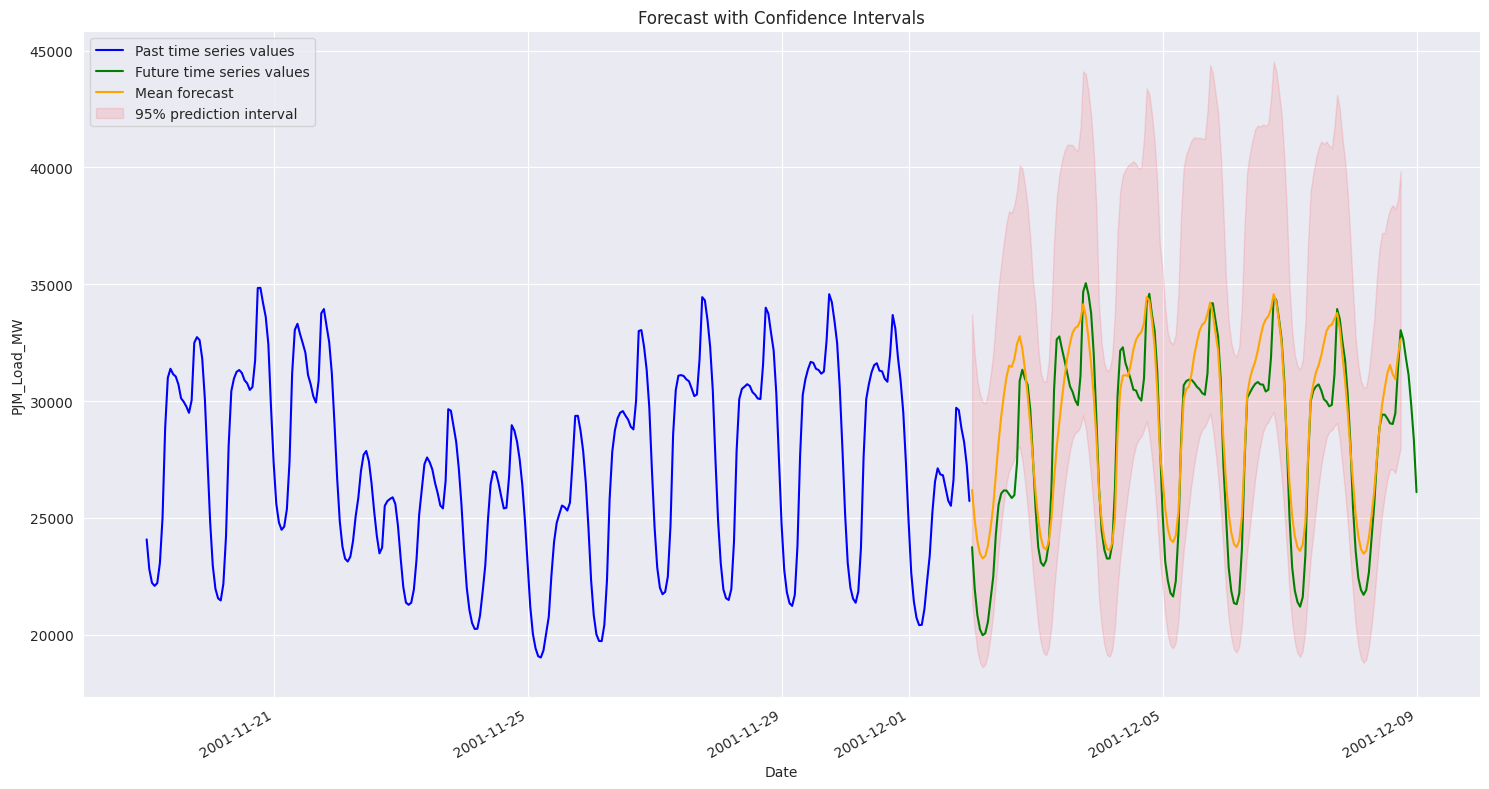

In [42]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Plot the last 2 weeks of training data
hist_last_week = train_data.last('2W')

# Ensure prediction object is converted to a 1-dimensional array if necessary
mean_forecast = prediction.forecast.squeeze()
upper_forecast = prediction.upper_forecast.squeeze()
lower_forecast = prediction.lower_forecast.squeeze()

# Convert to pandas Series and align indices
forecast_index = test_data.first('2W').index
mean_series = pd.Series(mean_forecast, index=forecast_index)
upper_series = pd.Series(upper_forecast, index=forecast_index)
lower_series = pd.Series(lower_forecast, index=forecast_index)

# Setup the Seaborn style
sns.set_style("darkgrid")

# Plotting
plt.figure(figsize=(15, 8))



# Determine the last date of the forecast to limit the test data
last_forecast_date = forecast_index[-1]

# Filter the test data to include only the dates up to the end of the forecast
test_up_to_forecast = test_data[test_data.index <= last_forecast_date]

plt.plot(hist_last_week.index, hist_last_week[label_column], label="Past time series values", color='blue')

# Plot the test data
plt.plot(test_up_to_forecast.index, test_up_to_forecast[label_column], label="Future time series values", color='green')

# Overlay the forecast
plt.plot(forecast_index, mean_series, label="Mean forecast", color='orange')

# Shade the confidence interval
plt.fill_between(forecast_index, lower_series, upper_series, color='red', alpha=0.1, label="95% prediction interval")

# Formatting the plot
plt.title('Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel(label_column)
plt.legend(loc='upper left')

# Set x-axis major formatter
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Display the plot
plt.tight_layout()
plt.show()
